In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp

In [5]:
DATAFOLDER = Path("..\\data")
FIGSFOLDER = Path("..\\figures")
FIGSFOLDER = Path("C:\\Users\\jmc010\\Dropbox\\Publications in Progress\\IPP Giulia paper\\figs")

save_figs = False

def tweak_df(df):

    return (df
            .query("session == 's4'")
            )

df = pd.read_excel(DATAFOLDER / "metafile_ipp.xlsx", sheet_name="metafile Exp 2")
df = tweak_df(df)

In [6]:
def get_licks_per_solution(row):
    filename = row.medfile
    # print(f"Processing {filename}")

    L, R = tp.medfilereader(DATAFOLDER / filename, vars_to_extract=["b", "e"], remove_var_header=True)

    if "malt" in row.bottleL and "cas" in row.bottleR:
        med_var_malt, med_var_casein = L, R
    elif "malt" in row.bottleR and "cas" in row.bottleL:
        med_var_malt, med_var_casein = R, L
    else:
        raise ValueError("Bottles not found")
    
    return med_var_casein, med_var_malt

PR_cas, PR_malt = [], []
for row in df.query("dietgroup == 'PR'").iterrows():
    cas_licks, malt_licks = get_licks_per_solution(row[1])
    
    PR_cas.append(len(cas_licks))
    PR_malt.append(len(malt_licks))

NR_cas, NR_malt = [], []
for row in df.query("dietgroup == 'NR'").iterrows():
    cas_licks, malt_licks = get_licks_per_solution(row[1])
    
    NR_cas.append(len(cas_licks))
    NR_malt.append(len(malt_licks))

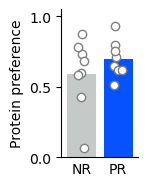

In [7]:
np.random.seed(41)
colors = ["xkcd:silver", "white", "xkcd:electric blue", "xkcd:powder blue"]

def jitter(x, n, spread=0.1):
    return x + np.random.normal(0, spread, n)

PR_pref = np.array(PR_cas) / (np.array(PR_cas) + np.array(PR_malt))
NR_pref = np.array(NR_cas) / (np.array(NR_cas) + np.array(NR_malt))

f, ax = plt.subplots(figsize=(1.4, 2),
                     gridspec_kw={"left": 0.4, "bottom": 0.21, "top": 0.95, "right": 0.95})

ax.bar( 0, np.mean(NR_pref), color=colors[0])
ax.bar( 1, np.mean(PR_pref), color=colors[2])

ax.scatter(jitter(0, len(NR_pref)), NR_pref, color="white", edgecolor="grey")
ax.scatter(jitter(1, len(PR_pref)), PR_pref, color="white", edgecolor="grey")

ax.set_ylim(0, 1.05)
ax.set_xlim(-0.55, 1.55)
ax.set_yticks([0, 0.5, 1])
ax.set_xticks([0, 1], labels=["NR", "PR"])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(axis='x', which='both', length=0)

ax.set_ylabel("Protein preference")

if save_figs:
    f.savefig(FIGSFOLDER / "4A_protein_preference.pdf", dpi=300)

In [ ]:
np.random.seed(41)
colors = ["xkcd:silver", "white", "xkcd:electric blue", "xkcd:powder blue"]

def jitter(x, n, spread=0.1):
    return x + np.random.normal(0, spread, n)

PR_pref = np.array(PR_cas) / (np.array(PR_cas) + np.array(PR_malt)) - 0.5
NR_pref = np.array(NR_cas) / (np.array(NR_cas) + np.array(NR_malt)) - 0.5

f, ax = plt.subplots(figsize=(1.4, 2),
                     gridspec_kw={"left": 0.4, "bottom": 0.21, "top": 0.95, "right": 0.95})

ax.bar( 0, np.mean(NR_pref), color=colors[0])
ax.bar( 1, np.mean(PR_pref), color=colors[2])

ax.scatter(jitter(0, len(NR_pref)), NR_pref, color="white", edgecolor="grey")
ax.scatter(jitter(1, len(PR_pref)), PR_pref, color="white", edgecolor="grey")

ax.set_ylim(-0.5, 0.6)
ax.set_xlim(-0.55, 1.55)
ax.set_yticks([-0.5,0, 0.5], labels=["0", "0.5", "1"])
ax.set_xticks([0, 1], labels=["NR", "PR"])

ax.axhline(0, color="black", lw=0.75, ls="--", zorder=0, alpha=0.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(axis='x', which='both', length=0)

ax.set_ylabel("Protein preference")

if save_figs:
    f.savefig(FIGSFOLDER / "4A_protein_preference.pdf", dpi=300)

In [8]:
## Statistics
t, p = ttest_1samp(NR_pref, 0.5)
print("NR preference: t={:.3f}, p={:.3f}".format(t, p))

t, p = ttest_1samp(PR_pref, 0.5)
print("PR preference: t={:.3f}, p={:.3f}".format(t, p))

NR preference: t=1.042, p=0.332
PR preference: t=4.352, p=0.003


In [9]:
def get_cumsum_licks(licks, bins=np.linspace(0, 3600, 61)):
    hist = np.histogram(licks, bins=bins)[0]
    return np.cumsum(hist)

bins=np.linspace(0, 3600, 61)

PR_cas, PR_malt = [], []
for row in df.query("dietgroup == 'PR'").iterrows():
    cas_licks, malt_licks = get_licks_per_solution(row[1])
    
    PR_cas.append(get_cumsum_licks(cas_licks))
    PR_malt.append(get_cumsum_licks(malt_licks))

NR_cas, NR_malt = [], []
for row in df.query("dietgroup == 'NR'").iterrows():
    cas_licks, malt_licks = get_licks_per_solution(row[1])
    
    NR_cas.append(get_cumsum_licks(cas_licks))
    NR_malt.append(get_cumsum_licks(malt_licks))
    
PR_cas = np.array(PR_cas)
PR_malt = np.array(PR_malt)
NR_cas = np.array(NR_cas)
NR_malt = np.array(NR_malt)

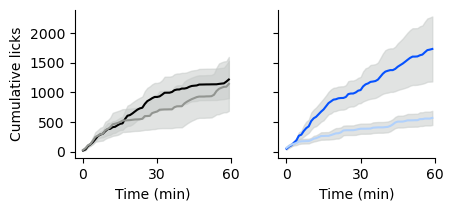

In [10]:
def make_cumsum_fig(cas_licks, malt_licks, bins, colors, ax):
    
    cas_sem = np.std(cas_licks, axis=0) / np.sqrt(cas_licks.shape[0])
    malt_sem = np.std(malt_licks, axis=0) / np.sqrt(malt_licks.shape[0])
    
    ax.fill_between(bins[:-1], np.mean(cas_licks, axis=0)-cas_sem, np.mean(cas_licks, axis=0)+cas_sem, color=colors[0], alpha=0.5)
    ax.plot(bins[:-1], np.mean(cas_licks, axis=0), color=colors[1], label="Casein")

    ax.fill_between(bins[:-1], np.mean(malt_licks, axis=0)-malt_sem, np.mean(malt_licks, axis=0)+malt_sem, color=colors[0], alpha=0.5)
    ax.plot(bins[:-1], np.mean(malt_licks, axis=0), color=colors[2], label="Maltodextrin")
    
    

f, [ax1, ax2] = plt.subplots(ncols=2, figsize=(4.5,2),
                                  sharey=True,
                                  gridspec_kw={"left": 0.15, "bottom": 0.21, "top": 0.95, "right": 0.95,
                                               "wspace": 0.3}
                                  )

colors_NR = ["xkcd:silver", "black", "xkcd:grey"]
colors_PR = ["xkcd:silver", "xkcd:electric blue", "xkcd:powder blue"]

make_cumsum_fig(NR_cas, NR_malt, bins, colors_NR, ax1)
make_cumsum_fig(PR_cas, PR_malt, bins, colors_PR, ax2)

for ax in [ax1, ax2]:
    ax.set_xlim(-200, 3600)
    ax.set_xticks([0, 1800, 3600], labels=[0, 30, 60])
    ax.set_xlabel("Time (min)")
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

ax1.set_ylabel("Cumulative licks")

if save_figs:
    f.savefig(FIGSFOLDER / "4B_cumulative_licks.pdf", dpi=300)